MODULO PANDAS


In [ ]:
import numpy as np
import pandas as pd

In [2]:
#SERIES
etiquetas = ['a','b','c']
datos = [1,2,3]
pd.Series(data = datos, index = etiquetas)

a    1
b    2
c    3
dtype: int64

In [3]:
array = np.arange(5,8)
etiqueta = ['venta1','ventas2','venta3']
serie1 = pd.Series(array,etiqueta)

In [4]:
serie1['venta1'] #Se accede directamente por la etiqueta

5

In [5]:
serie1[0] #O por posición

5

In [6]:
datos2 = ['informatica', 300,'impresora',400]

In [7]:
pd.Series(datos2)

0    informatica
1            300
2      impresora
3            400
dtype: object

In [8]:
serieCreada = pd.Series([1,2,3],['venta1','venta2','venta3'])
serieCreada

venta1    1
venta2    2
venta3    3
dtype: int64

DATAFRAMES

In [9]:

filas = ['ventas1','ventas2','ventas3']
columnas = ['zonaA','zonaB','zonaC']
datos = [[123,456,789],[234,345,456],[987,765,432]]

In [10]:
dataframe = pd.DataFrame(datos,filas,columnas)

In [11]:
dataframe

,zonaA,zonaB,zonaC
ventas1,123,456,789
ventas2,234,345,456
ventas3,987,765,432


In [12]:
dataframe.loc['ventas1'] #Selecciona la fila de ventas1

zonaA    123
zonaB    456
zonaC    789
Name: ventas1, dtype: int64

In [13]:
dataframe.loc[['ventas1','ventas2']]

,zonaA,zonaB,zonaC
ventas1,123,456,789
ventas2,234,345,456


In [14]:
dataframe[['zonaA','zonaC']] #Para seleccionar una columna

,zonaA,zonaC
ventas1,123,789
ventas2,234,456
ventas3,987,432


In [15]:
dataframe.loc['ventas1']['zonaB'] #Localizar un elemento en una fila de determinada columna

456

In [16]:
dataframe['Todas las zonas'] = dataframe['zonaA'] + dataframe['zonaB'] + dataframe['zonaC'] #Crea una nueva columna sumando todas las zonas

In [17]:
dataframe

,zonaA,zonaB,zonaC,Todas las zonas
ventas1,123,456,789,1368
ventas2,234,345,456,1035
ventas3,987,765,432,2184


In [18]:
dataframe = dataframe.drop('Todas las zonas',1) #Elimina una columna

In [19]:
dataframe

,zonaA,zonaB,zonaC
ventas1,123,456,789
ventas2,234,345,456
ventas3,987,765,432


SELECCION DE DATOS CON UNA CONDICION

In [20]:

filas = 'ventas1 ventas2 ventas3'.split()
filas

['ventas1', 'ventas2', 'ventas3']

In [21]:
columnas='zona1 zona2 zona3'.split()
columnas

['zona1', 'zona2', 'zona3']

In [22]:
datos = [[120,340,250], [210,450,250], [310,210,140]]

In [23]:
dataframe = pd.DataFrame(datos,filas,columnas)
dataframe

,zona1,zona2,zona3
ventas1,120,340,250
ventas2,210,450,250
ventas3,310,210,140


In [24]:
condicion = dataframe > 200

In [25]:
dataframe[condicion]

,zona1,zona2,zona3
ventas1,NaN,340,250.0
ventas2,210.0,450,250.0
ventas3,310.0,210,NaN


MODIFICACION DE LOS NOMBRES DE LA FILA

In [26]:

dataframe

,zona1,zona2,zona3
ventas1,120,340,250
ventas2,210,450,250
ventas3,310,210,140


In [27]:
nuevas_filas = 'dia1 dia2 dia3'.split()
nuevas_filas

['dia1', 'dia2', 'dia3']

In [28]:
dataframe['dias'] = nuevas_filas #Agrega nueva columna al dataframe
dataframe

,zona1,zona2,zona3,dias
ventas1,120,340,250,dia1
ventas2,210,450,250,dia2
ventas3,310,210,140,dia3


In [29]:
dataframe.set_index('dias') #Cambia dias por ventas

,zona1,zona2,zona3
dias,,,
dia1,120,340,250
dia2,210,450,250
dia3,310,210,140


In [30]:
dataframe = dataframe.set_index('dias')

In [31]:
dataframe

,zona1,zona2,zona3
dias,,,
dia1,120,340,250
dia2,210,450,250
dia3,310,210,140


TRATAMIENTO DE DATOS NULOS

In [32]:

diccionario = {'A':[4,5,np.nan], 'B': [6,1,5],'C':[np.nan,4,np.nan]}

In [33]:
dataframe = pd.DataFrame(diccionario)

In [34]:
dataframe

,A,B,C
0,4.0,6,NaN
1,5.0,1,4.0
2,NaN,5,NaN


In [35]:
dataframe.dropna() #Elimina filas que tiene algun nulo

,A,B,C
1,5.0,1,4.0


In [36]:
dataframe.dropna(1) #elimina columnas que tenga algun nulo

,B
0,6
1,1
2,5


In [37]:
dataframe

,A,B,C
0,4.0,6,NaN
1,5.0,1,4.0
2,NaN,5,NaN


In [38]:
dataframe.fillna(value = 100) #Rellena los nulos con un valor

,A,B,C
0,4.0,6,100.0
1,5.0,1,4.0
2,100.0,5,100.0


In [39]:
valor_medio = dataframe.mean() #Saca el valor medio por columna
valor_medio 

A    4.5
B    4.0
C    4.0
dtype: float64

In [40]:
dataframe.fillna(value= valor_medio) #Rellena los nulos con el valor medio por columna 

,A,B,C
0,4.0,6,4.0
1,5.0,1,4.0
2,4.5,5,4.0


AGRUPACION DE DATOS

In [41]:

diccionario = {'dias':['dia1','dia1','dia2','dia2','dia3'], 'vendedores':['Antonio','Maria','Jose','Marta','Juan'], 'ventas': [100,400,200,500,300]}
dataframe = pd.DataFrame(diccionario)
dataframe

,dias,vendedores,ventas
0,dia1,Antonio,100
1,dia1,Maria,400
2,dia2,Jose,200
3,dia2,Marta,500
4,dia3,Juan,300


In [42]:
dataframe.groupby('dias').mean() #Agrupa la media por dias

,ventas
dias,
dia1,250
dia2,350
dia3,300


In [43]:
dataframe.groupby('dias').sum() #Agrupa la suma por dias

,ventas
dias,
dia1,500
dia2,700
dia3,300


In [44]:
dataframe.groupby('dias').describe() #Saca todos los valores por dia

ventas                                                      
      count   mean         std    min    25%    50%    75%    max
dias                                                             
dia1    2.0  250.0  212.132034  100.0  175.0  250.0  325.0  400.0
dia2    2.0  350.0  212.132034  200.0  275.0  350.0  425.0  500.0
dia3    1.0  300.0         NaN  300.0  300.0  300.0  300.0  300.0

COMBINAR DATAFRAMES

In [45]:

diccionario = {'A': [1,2,3], 'B': [4,5,6], 'C': [7,8,9]}

In [46]:
dataframe = pd.DataFrame(diccionario)
dataframe

,A,B,C
0,1,4,7
1,2,5,8
2,3,6,9


In [47]:
diccionario2 = {'A': [11,12,13], 'B': [14,15,16], 'C': [17,18,19]}

In [48]:
dataframe2 = pd.DataFrame(diccionario2)
dataframe2

,A,B,C
0,11,14,17
1,12,15,18
2,13,16,19


In [49]:
 pd.concat([dataframe,dataframe2]) #Concatena los dataframes uno debajo del otro

,A,B,C
0,1,4,7
1,2,5,8
2,3,6,9
0,11,14,17
1,12,15,18
2,13,16,19


In [50]:
pd.concat([dataframe,dataframe2], axis= 1) #Concatena los dataframes uno al lado del otro

,A,B,C,A,B,C
0,1,4,7,11,14,17
1,2,5,8,12,15,18
2,3,6,9,13,16,19


MERGE DATAFRAMES

In [51]:

diccionario = {'A':[1,2,3],'B':[4,5,6],'clave':['c1','c2','c3']}
dataframe1 = pd.DataFrame(diccionario)
dataframe1

,A,B,clave
0,1,4,c1
1,2,5,c2
2,3,6,c3


In [52]:
diccionario2 = {'C':[11,12,13],'D':[14,15,16],'clave':['c1','c2','c3']}
dataframe2 = pd.DataFrame(diccionario2)
dataframe2

,C,D,clave
0,11,14,c1
1,12,15,c2
2,13,16,c3


In [53]:
pd.merge(dataframe1,dataframe2, on = 'clave') #Realiza la union entre dataframe1  y dataframe2 por medio de la variable clave

,A,B,clave,C,D
0,1,4,c1,11,14
1,2,5,c2,12,15
2,3,6,c3,13,16


JOIN DATAFRAMES

In [54]:

diccionario = {'A':[1,2,3], 'B':[4,5,6]}
dataframe1 = pd.DataFrame(diccionario, index = ['i1','i2','i3'])#Cambiando el index de dataframe
dataframe1

,A,B
i1,1,4
i2,2,5
i3,3,6


In [55]:
diccionario2 = {'C':[11,12,13], 'D':[14,15,16]}
dataframe2 = pd.DataFrame(diccionario2, index=['i1','i2','i3'])#Cambiando index de dataframe
dataframe2

,C,D
i1,11,14
i2,12,15
i3,13,16


In [56]:
dataframe1.join(dataframe2) #Une dataframe2 al dataframe1 por tener el mismo index pero diferente columnas

,A,B,C,D
i1,1,4,11,14
i2,2,5,12,15
i3,3,6,13,16


OPERACIONES CON DATAFRAMES

In [57]:

diccionario = {'A':[11,12,10,12],'B':[14,18,16,17]}
dataframe = pd.DataFrame(diccionario, index = ['i1','i2','i3','i4'])
dataframe

,A,B
i1,11,14
i2,12,18
i3,10,16
i4,12,17


In [58]:
dataframe['A'].unique() #Array de los numeros que no se repiten de la columna A

array([11, 12, 10], dtype=int64)

In [59]:
dataframe['A'].nunique() #Numero de numeros que no se repiten de la columna A

3

In [60]:
dataframe['A'].value_counts() #Tabla de elementos y cuantas veces se repite

12    2
11    1
10    1
Name: A, dtype: int64

In [61]:
def multiplicar(x):
    return x*2

In [62]:
dataframe['A'].apply(multiplicar)#Aplica la funcion multiplicar a la columna A

i1    22
i2    24
i3    20
i4    24
Name: A, dtype: int64

In [63]:
dataframe['A'].apply(lambda x:x*2) #Aplica la funcion a la columna A

i1    22
i2    24
i3    20
i4    24
Name: A, dtype: int64

In [64]:
dataframe

,A,B
i1,11,14
i2,12,18
i3,10,16
i4,12,17


In [65]:
dataframe.drop('B',1) #Borrar columna B

,A
i1,11
i2,12
i3,10
i4,12


In [66]:
dataframe.drop('i4') #Borra Fila

,A,B
i1,11,14
i2,12,18
i3,10,16


In [67]:
dataframe

,A,B
i1,11,14
i2,12,18
i3,10,16
i4,12,17


In [68]:
dataframe.columns # Nombre de las columnas

Index(['A', 'B'], dtype='object')

In [69]:
dataframe.index #Nombre de los index

Index(['i1', 'i2', 'i3', 'i4'], dtype='object')

In [70]:
dataframe.sort_values('B') #Ordena los valores por la columna B

,A,B
i1,11,14
i3,10,16
i4,12,17
i2,12,18


FICHEROS EXCEL

In [72]:
pwd

'd:\\Universidad\\Cursos\\Machine Learning. Curso Basico Machine Learning\\Modulo Pandas para analisis de datos'

In [73]:
# dataframe = pd.read_excel('Nombre_excel.xlsx)

FICHEROS HTML

In [74]:

pagina_web = 'https://es.wikipedia.org/wiki/Anexo:Pa%C3%ADses_y_territorios_dependientes_por_poblaci%C3%B3n'

In [75]:
datos = pd.read_html(pagina_web)

In [76]:
type(datos) #datos es de tipo lista

list

In [77]:
dataframe = datos[0] #Guarda en el primer lugar de la lista la tabla 
dataframe.head(10)

,№,País (o territorio dependiente),Proyecciónexponencialde lapoblaciónal1/7/2020[8]​,% deltotalmun-dial,Cambiomedioanual(%)[9]​,Cambioabsolutoanualpromedio,% delcambiomedioabs.total anual,Añosparaeven-tualdu-pli-ca-ción[10]​,"Censo másreciente,últimaestimaciónoficial,proyecciónde la ONUo reloj depoblaciónnacional",Fecha(d/mm/aaaa)[11]​,Tipo[12]​,Enlace (usualmente oficial) deesta última cifra de población.
0,1,India,1 409 902 000,1813,164,23 172 000,2247,43,1 375 732 000,25/08/2020,R,www.indiastat.com
1,2,China[13]​,1 403 426 000,1805,048,6 762 000,656,144,1 409 612 000,25/08/2020,R,data.stats.gov.cn
2,3,Estados Unidos,331 800 000,427,071,2 339 000,227,99,330 178 000,25/08/2020,R,www.census.gov
3,4,Indonesia,271 629 000,349,132,3 594 000,348,53,268 074 600,1/07/2019,E,www.bps.go.id
4,5,Pakistán,224 654 000,289,240,5 386 000,522,29,207 776 954,15/03/2017,P,www.citypopulation.de
5,6,Nigeria,219 743 000,283,324,7 131 000,691,22,193 392 517,1/07/2016,E,nigerianstat.gov.ng
6,7,Brasil,211 420 000,272,070,1 477 000,143,100,211 958 000,25/08/2020,R,www.ibge.gov.br
7,8,Bangladés,181 781 000,234,211,3 827 000,371,33,166 221 000,15/03/2016,E,www.citypopulation.de
8,9,Rusia[14]​,146 712 000,189,-004,-66 000,-,-,146 745 098,1/01/2020,E,www.gks.ru
9,10,México,127 792 000,164,096,1 224 000,119,73,127 792 286,1/07/2020,E,www.conapo.gob.mx


GRABAR DATAFRAME EN TABLA SQL

In [79]:

from sqlalchemy import create_engine

In [80]:
diccionario = {'A':[1,2,3], 'B':[4,5,6]}
dataframe= pd.DataFrame(diccionario)
dataframe

,A,B
0,1,4
1,2,5
2,3,6


In [81]:
engine = create_engine('sqlite:///:memory:')

In [82]:
dataframe.to_sql('tabla', engine, index=False)

In [83]:
datos_leidos_bd = pd.read_sql('tabla', con=engine)

In [84]:
datos_leidos_bd

,A,B
0,1,4
1,2,5
2,3,6


GRAFICOS CON PANDAS

In [85]:

dataframe = pd.DataFrame(np.random.randint(200, size=(50,4)),columns=['a','b','c','d'])

In [86]:
dataframe

,a,b,c,d
0,89,65,130,106
1,11,3,47,23
2,129,61,195,60
3,28,8,178,136
4,90,63,19,176
5,55,45,71,70
6,21,85,143,86
7,19,99,112,39
8,31,174,5,33
9,104,155,52,79


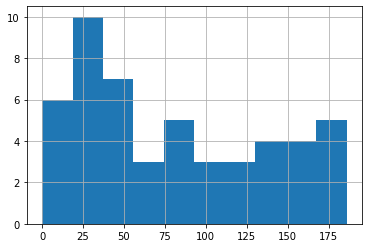

In [88]:
dataframe['a'].hist()

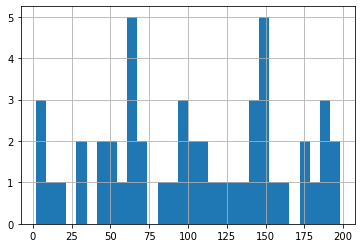

In [89]:
dataframe['b'].hist(bins=30)

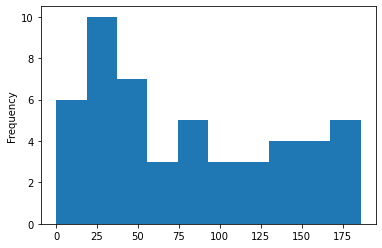

In [90]:
dataframe['a'].plot.hist()

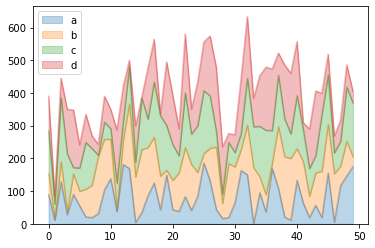

In [92]:
dataframe.plot.area(alpha=0.3)

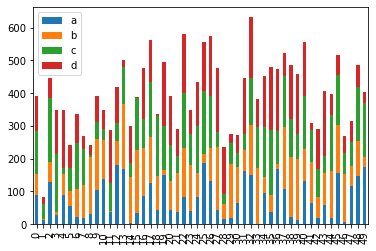

In [95]:
dataframe.plot.bar(stacked=True)

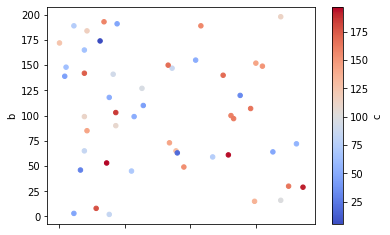

In [97]:
dataframe.plot.scatter(x='a',y='b',c='c',cmap='coolwarm')

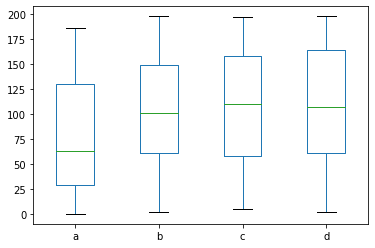

In [98]:
dataframe.plot.box()

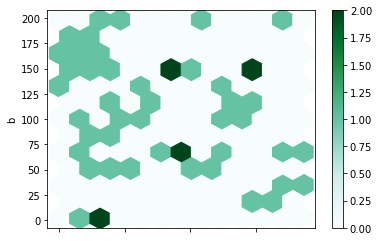

In [100]:
dataframe.plot.hexbin(x='a',y='b', gridsize=12)

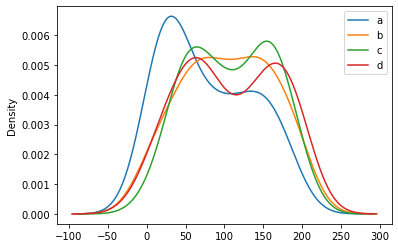

In [101]:
dataframe.plot.kde()